In [1]:
import pandas as pd

In [2]:
import xlrd as xl

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [6]:
sample=pd.read_excel('샘플링.xlsx')

In [7]:
sample.head()

,Store,Assortment,Sales(EUR),개월수,월별 매출,CompetitionDistance(M),CompetitionOpenSinceYear,중도 경쟁사 open
0,1,a,3716854,31,119898.516129,1270,2008.0,NaN
1,2,a,3883858,31,125285.741935,570,2007.0,NaN
2,3,a,5408261,31,174460.032258,14130,2006.0,NaN
3,4,c,7556507,31,243758.290323,620,2009.0,NaN
4,5,a,3642818,31,117510.258065,29910,2015.0,Y


## 매출과 경쟁사 거리의 관계

In [8]:
np.corrcoef(sample["월별 매출"], sample["CompetitionDistance(M)"])

array([[1.        , 0.03200163],
       [0.03200163, 1.        ]])

#### 관계가 없다.

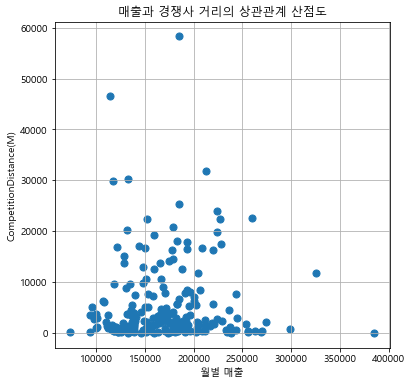

In [14]:
plt.figure(figsize=(6,6))
plt.scatter(sample['월별 매출'], sample['CompetitionDistance(M)'], s=50)
plt.xlabel('월별 매출')
plt.ylabel('CompetitionDistance(M)')
plt.title("매출과 경쟁사 거리의 상관관계 산점도")
plt.grid()
plt.show()

## 요일별 매출 관계

In [15]:
day=pd.read_excel('store 요일.xlsx')

In [16]:
day

,Store,요일,DayOfWeek,Sales,영업일수,요일별 매출
0,NaN,월요일 총매출,1,662780,128,5177.968750
1,NaN,화요일 총매출,2,627874,134,4685.626866
2,NaN,수요일 총매출,3,601354,132,4555.712121
3,NaN,목요일 총매출,4,552772,124,4457.838710
4,NaN,금요일 총매출,5,609716,129,4726.480620
5,NaN,토요일 총매출,6,662358,134,4942.970149


In [17]:
np.corrcoef(day["DayOfWeek"], day["요일별 매출"])

array([[ 1.        , -0.23311855],
       [-0.23311855,  1.        ]])

#### 약한 상관관계, 하지만 상관관계보다 다른 그래프가 더 좋은 결과를 가져올 것 같다.

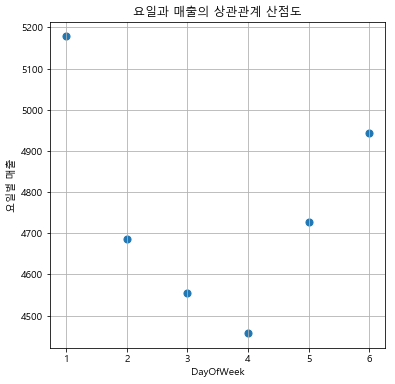

In [19]:
plt.figure(figsize=(6,6))
plt.scatter(day['DayOfWeek'], day['요일별 매출'], s=50)
plt.xlabel('DayOfWeek')
plt.ylabel('요일별 매출')
plt.title("요일과 매출의 상관관계 산점도")
plt.grid()
plt.show()

#### 유의미한 자료를 얻었다.

In [20]:
fp1 = np.polyfit(day['DayOfWeek'], day['요일별 매출'], 1)
fp1

array([ -32.86586148, 4872.79671784])

In [21]:
fp1 = np.polyfit(day['DayOfWeek'], day['요일별 매출'], 2)
fp1

array([  91.75685155, -675.16382234, 5729.19399899])

#### 2차함수를 이용하기

In [22]:
import scipy as sp

In [24]:
x= day['DayOfWeek']
y= day['요일별 매출']

In [26]:
def error(f,x,y):
    return sp.sum((f(x)-y)**2)

In [25]:
fp=sp.polyfit(x,y,2)
print(fp)

[  91.75685155 -675.16382234 5729.19399899]


In [29]:
# 2차항 회귀계수 생성
fp2=sp.poly1d(fp)
print(error(fp2,x,y))

14611.749444006027


#### 2차항 모델 시각화

In [53]:
fx=sp.linspace(1,x[5],2000)

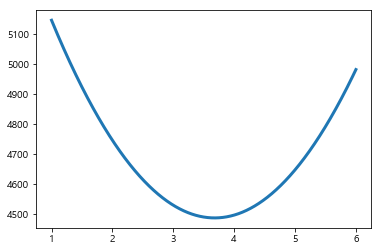

In [54]:
plt.plot(fx,fp2(fx),linewidth=3)

#### 수,목요일은 매출이 급감한다. 월요일 매출이 가장 높다

In [55]:
# 프로모션 유무에 따른 매출 차이
# 공휴일의 파급효과
# 매장 유형에 따른 매출


# 경쟁사 오픈 여부에 따른 매출 차이


# -> 효과적인 매출 통제 방법 추출 등등